In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import CategoricalNB
from sklearn.metrics import accuracy_score, confusion_matrix


In [2]:
path = "/content/drive/MyDrive/play_tennis.csv"
df = pd.read_csv(path)
print(df.head())


                                     ### play_tennis.csv
Outlook  Temperature Humidity Wind            PlayTennis
Sunny    Hot         High     Weak                    No
                              Strong                  No
Overcast Hot         High     Weak                   Yes
Rain     Mild        High     Weak                   Yes


In [3]:
le = LabelEncoder()

for column in df.columns:
    df[column] = le.fit_transform(df[column])

print(df)


                                      ### play_tennis.csv
Outlook  Temperature Humidity Wind                      1
Sunny    Hot         High     Weak                      0
                              Strong                    0
Overcast Hot         High     Weak                      2
Rain     Mild        High     Weak                      2
...                                                   ...
Adult    Cold        Soup     NaN                       3
Teen     Hot         Juice    NaN                       3
Senior   Cold        Tea      NaN                       3
Adult    Hot         Salad    NaN                       3
Child    Cold        Milk     NaN                       3

[112 rows x 1 columns]


In [9]:
df=pd.read_csv(path, skiprows=1)
X = df.drop("PlayTennis", axis=1)
y = df["PlayTennis"]
le=LabelEncoder()
for column in X.columns:
    X[column]=le.fit_transform(X[column])
    y = le.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [10]:
model = CategoricalNB()
model.fit(X_train, y_train)


CategoricalNB()

In [11]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8823529411764706


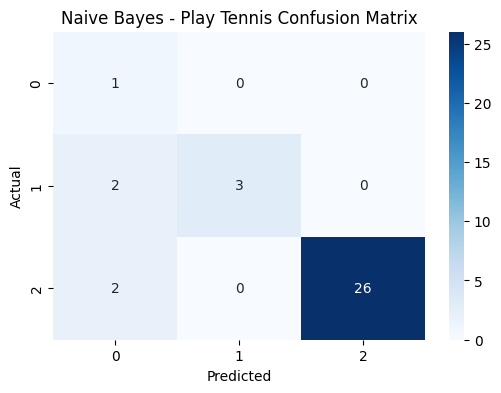

In [12]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Naive Bayes - Play Tennis Confusion Matrix")
plt.show()
